In [43]:
##### K Means
import matplotlib.pyplot as plt
import seaborn as sns; 
import numpy as np
import pandas as pd


# 1. Lee el csv

In [44]:
df = pd.read_csv("credit_card_customer_data.csv")

In [45]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [46]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


# 2. Aplica el kmeans

* ¿Debemos transformar los datos previamente? ¿por que?

Si, por ej dropear el SI_No, y el Customer key, por que so datos de reconocimiento

Y luego estandarizar.

In [47]:
df.drop(columns= ["Sl_No", "Customer Key"], inplace=True)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
scaler.fit(df)

StandardScaler()

In [50]:
df_esc = scaler.transform(df)

* ¿Cómo elegimos la mejor agrupación?

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [52]:
kmeans=KMeans(n_clusters = 3)
kmeans.fit(df_esc)

e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3)

In [53]:
labels=kmeans.predict(df_esc)
silhouette_score(df_esc, labels)
kmeans.inertia_

933.0437490000536

In [54]:
sse=[]
silhouettes=[]
for k in range(2, 10):
    kmeans=KMeans(n_clusters = k)
    kmeans.fit(df_esc)
    
    labels=kmeans.predict(df_esc)
    silhouettes.append(silhouette_score(df_esc, labels))
    sse.append(kmeans.inertia_)

e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

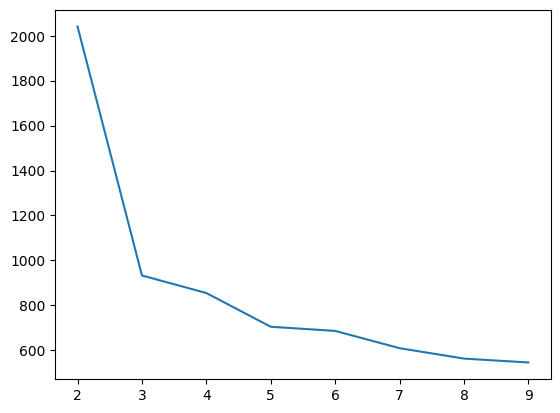

In [55]:
sse
silhouettes
plt.plot(range(2, 10),sse)

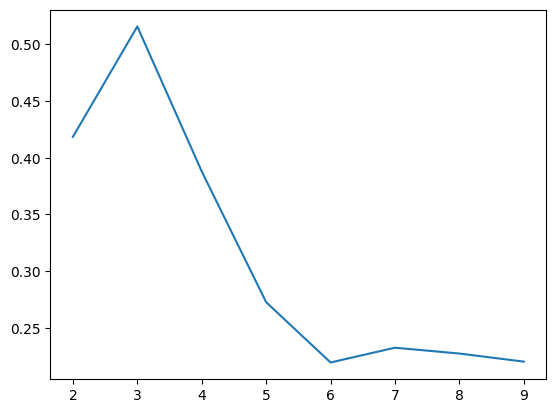

In [56]:
plt.plot(range(2, 10),silhouettes)

nos quedamos con el numero 3

In [57]:
kmeans=KMeans(n_clusters = 3)
kmeans.fit(df_esc)

labels=kmeans.predict(df_esc)
labels

e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
kmeans.cluster_centers_

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

# 3. Interpreta el clustering resultante

* Escoge 2 variables y haz un gráfico con esas dos variables en el eje x y y
usando relplot de seaborn. Utiliza el label que asigna el kmeans para pintar
los puntos por colores.

    Repite el paso previo para varias variables.

In [58]:
df['cluster']=labels

In [59]:
df.groupby("cluster").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
cluster,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


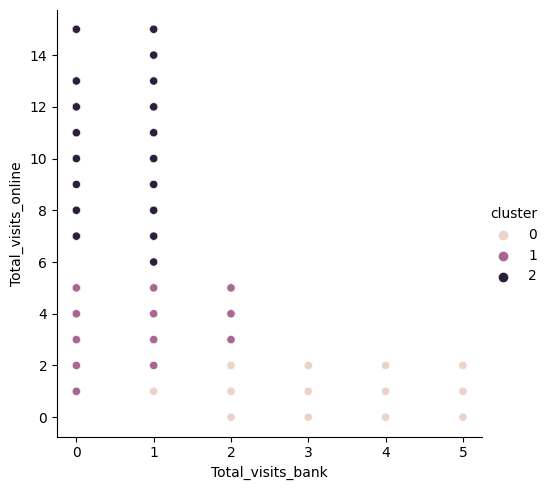

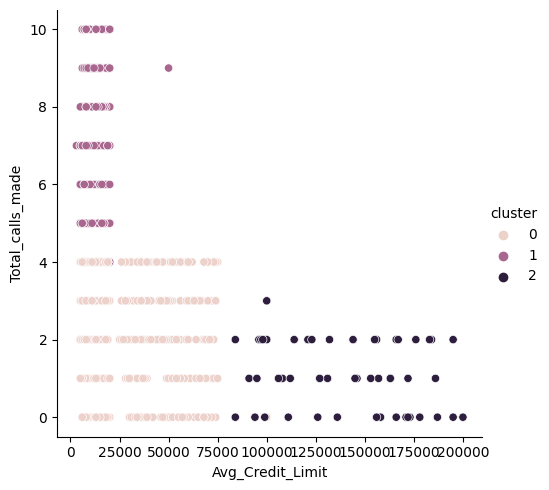

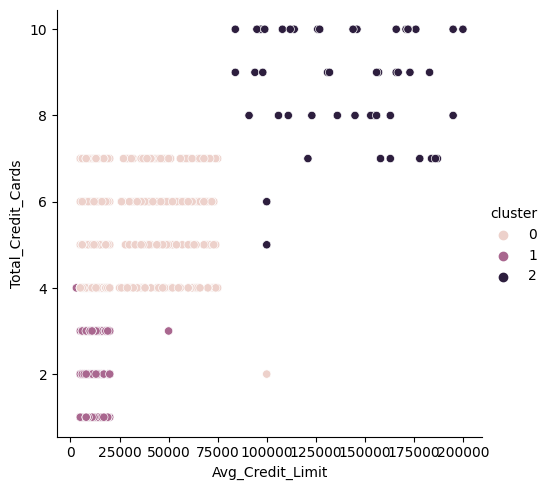

In [66]:
sns.relplot(data=df, x="Total_visits_bank", y =  "Total_visits_online", hue='cluster')
sns.relplot(data=df, x="Avg_Credit_Limit", y =  "Total_calls_made", hue='cluster')
sns.relplot(data=df, x="Avg_Credit_Limit", y =  "Total_Credit_Cards", hue='cluster')
plt.show()

Creo que los grupo se conforman de:
0) gente de medio poder adquisitvo, probablemente mayor por la frecunecia de las visitas.

1) gente de pococ poder aquisitivo, probablemente joven por el uso del online, y pocas tarjetas.

2) gente con mucho poder adquisitivo, probablemente edad mediana por el uso del online.


¿como podemos interpretar estos clusterings? ¿que tipo de usuarios hay en
cada cluster? Para ello, debemos poner el label del cluster al dataframe
original sin transformar, y hacer las medias de cada variable por cada grupo
(groupby)

In [ ]:
df.groupby("cluster").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
cluster,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


# 4. Prueba otra k (por ejemplo haciendo un cluster mas) y reinterpreta los clusters.

In [67]:
kmeans4=KMeans(n_clusters = 4)
kmeans4.fit(df_esc)

labels4=kmeans4.predict(df_esc)
labels4

e:\Apps\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3,
       0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3,
       3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,

* Escoge 2 variables y haz un gráfico con esas dos variables en el eje x y y
usando relplot de seaborn. Utiliza el label que asigna el kmeans para pintar
los puntos por colores.

    Repite el paso previo para varias variables.

In [68]:
df['cluster']=labels4

In [69]:
df.groupby("cluster").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
cluster,,,,,
0,35904.522613,5.522613,2.477387,0.969849,2.075377
1,12167.420814,2.393665,0.927602,3.574661,6.923077
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,31226.315789,5.478947,4.515789,1.010526,1.936842


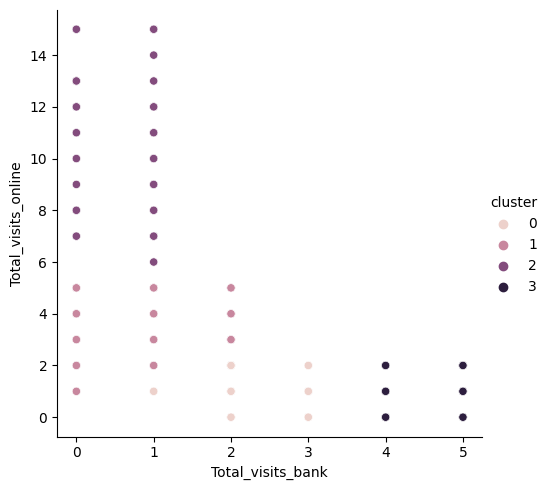

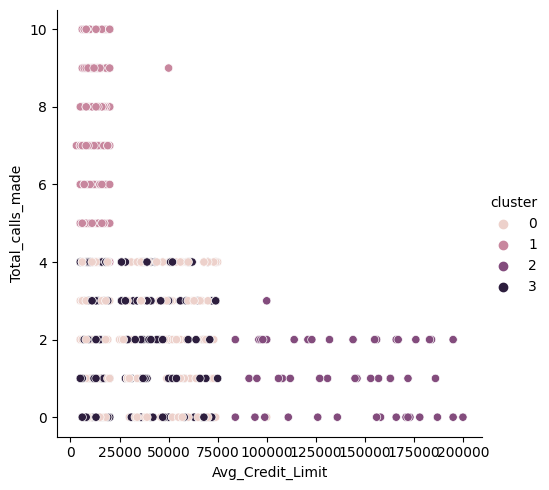

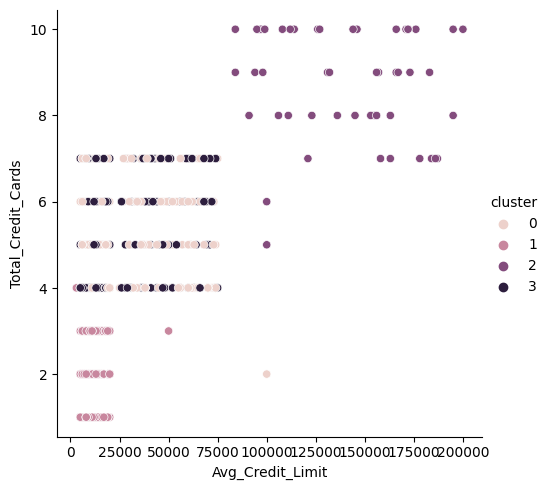

In [70]:
sns.relplot(data=df, x="Total_visits_bank", y =  "Total_visits_online", hue='cluster')
sns.relplot(data=df, x="Avg_Credit_Limit", y =  "Total_calls_made", hue='cluster')
sns.relplot(data=df, x="Avg_Credit_Limit", y =  "Total_Credit_Cards", hue='cluster')
plt.show()

La verdad que con k=4 se mezla todo bastante y no queda bn diferenciados los grupos


¿como podemos interpretar estos clusterings? ¿que tipo de usuarios hay en
cada cluster? Para ello, debemos poner el label del cluster al dataframe
original sin transformar, y hacer las medias de cada variable por cada grupo
(groupby)

In [71]:
df.groupby("cluster").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
cluster,,,,,
0,35904.522613,5.522613,2.477387,0.969849,2.075377
1,12167.420814,2.393665,0.927602,3.574661,6.923077
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,31226.315789,5.478947,4.515789,1.010526,1.936842
